In [ ]:
# @title Importing req. modules
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

: 

In [11]:
# @title Loading the scraped data of IBM Linkedin page post
data = pd.read_csv("ALL_IBM_post_data.csv")
data.head()

,postID,tm_stamp,typ,fol,react,comments,repost,edit,link,exact_date
0,7.179370e+18,1711694446,Images,16213300,51,4,3,yes,https://www.linkedin.com/posts/ibm_responsible...,29-03-24
1,7.179020e+18,1711611080,Images,16213300,49,2,1,yes,https://www.linkedin.com/posts/ibm_responsible...,28-03-24
2,7.178280e+18,1711436433,Images,16213300,193,4,6,no,https://www.linkedin.com/posts/ibm_meet-sanjul...,26-03-24
3,7.178120e+18,1711398000,Images,16213300,178,8,12,yes,https://www.linkedin.com/posts/ibm_genai-ai-wa...,26-03-24
4,7.177940e+18,1711355324,Images,16213300,86,1,8,no,https://www.linkedin.com/posts/ibm_sustainabil...,25-03-24


In [12]:
# @title Pre-processing data
data["edit"] = data["edit"] == 'yes'
data["exact_date"] = pd.to_datetime(data["exact_date"], format = "%d-%m-%y")

[Text(0, 0, '700.58'), Text(0, 0, '55.16'), Text(0, 0, '16.97')]

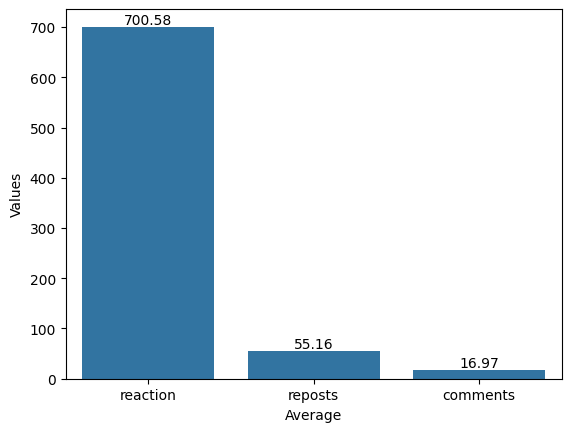

In [71]:
# @title Average values of reaction, reposts and comments on the post
avg_react = round(data["react"].sum()/data["postID"].count(),2)
avg_repost = round(data["repost"].sum()/data["postID"].count(),2)
avg_comment = round(data["comments"].sum()/data["postID"].count(),2)
dic = {'x':['reaction','reposts','comments'],'y':[avg_react,avg_repost,avg_comment]}

ag = sns.barplot(x='x', y='y', data=dic)
ag.set(xlabel="Average",ylabel="Values")
ag.bar_label(ag.containers[0], fontsize=10)

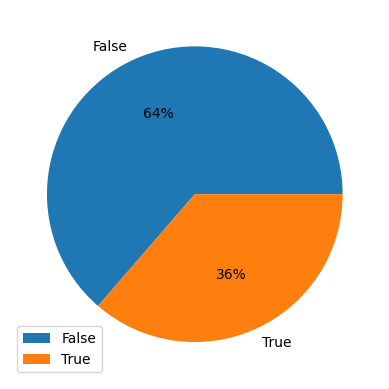

In [16]:
# @title How many post edited?
data.groupby('edit').size().plot(kind='pie',autopct='%1.0f%%').legend(loc="lower left")

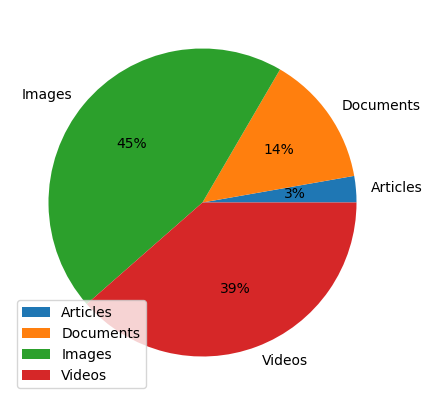

In [17]:
# @title Categories of post
data.groupby('typ').size().plot(kind='pie',legend = 1, figsize=(5,5),autopct='%1.0f%%').legend(loc='lower left')

[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Followers count')]

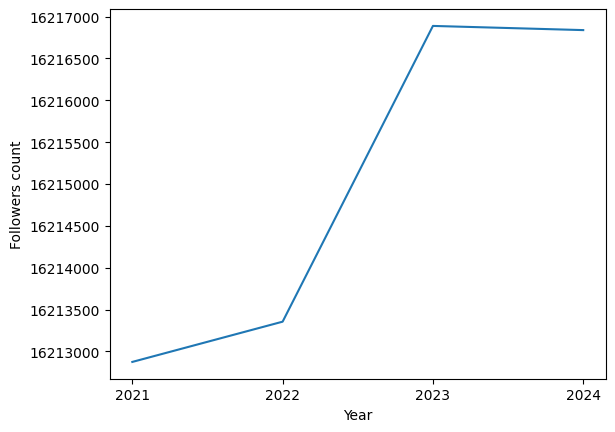

In [85]:
# @title Number of followers per year
d = data.groupby(data['exact_date'].map(lambda x: x.year)).max()
fol_line = sns.lineplot(data=d,x=d.index,y=d['fol'])
fol_line.ticklabel_format(style='plain', axis='y',useOffset=False)
fol_line.set_xticks([2021,2022,2023,2024])
fol_line.set(xlabel="Year",ylabel="Followers count")
#fol_line.grid(b=True, which='major', color='black', linewidth=0.075)
#fol_line.grid(b=True, which='minor', color='black', linewidth=0.075)

[Text(0, 0, '22'), Text(0, 0, '44'), Text(0, 0, '339'), Text(0, 0, '101')]

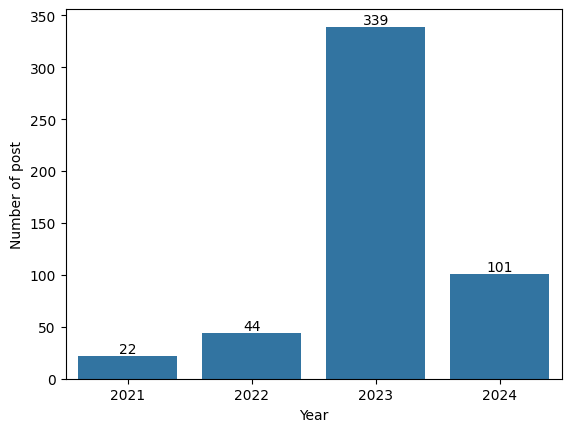

In [81]:
# @title Number of post per year
d1 = data.groupby(data['exact_date'].map(lambda x: x.year)).count()
post_cont = sns.barplot(data=d1,x=d1.index,y=d1['postID'])
post_cont.set(xlabel="Year",ylabel="Number of post")
post_cont.bar_label(post_cont.containers[0], fontsize=10)